## Overview of TF-IDF

TF-IDF (short for term frequency–inverse document frequency) is a numerical statistic that is intended to reflect how important a word is to a document in a corpus.

The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word.

So, words that are common in every document, such as "this", "what", and "if", rank low even though they may appear many times, since they don’t mean much to that document in particular. However, if the word "Bug" appears many times in a document, while not appearing many times in others, it probably means that it’s very relevant.

## Ingest Data

* The tickets that were used to train model (created during the Code Sprint): "sample_data.json".
* The number of tickets used to train the model: 31794 tickets.
* No filtering was employed. Only the ticket text (tittle and body) were used.

**Data used for training:** all tickets (title and body text data) from "sample_data.json"
**Data used for keyword extraction:** first 500 tickets (only title and body text data) from "sample_data.json"

In [19]:
import pandas as pd
import json
import csv
import re

import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [20]:
"""Get data for training"""

csv_file_path = 'data/tickets_clean.csv'
json_file_path = 'data/ticket_data.json'

data = []
with open(csv_file_path, encoding="utf8") as csv_file:
    csv_reader = csv.DictReader(csv_file)
    
    for rows in csv_reader:
        ticket = {}
        
        ticket["id"] = rows['id']
        ticket["title"] = rows['title']
        ticket["content"] = rows['content']
        
        data.append(ticket)
        
with open(json_file_path, 'w') as json_file:
    json_file.write(json.dumps(data))

In [21]:
csv_file_path = 'data/all_annotated_tickets.csv'
json_file_path = 'data/all_annotated_tickets.json'

data_human = {}
all_taggers = "0,1,2,3,4,5,6,7,8,9,A101QHE1KC1KID,A102UBN1SZ3L6R,A10443E11ZWEHJ,A105ZUIAGMN8SW,A10DMENL2H243H,A110SC5K5Y3IHS,A125CSLTW9CXZC,A12ZZH26QAUZMW,A149O2NE7FCY8U,A14EVJ76ZAKIZA,A14FH51IF9CX3G,A14Y81LKOWN3KD,A152S7LOEE5B38,A15SJZQBR8I3B3,A17AF42SNQNH9C,A17FYT6ZH5L6RL,A17HVHGFQW5373,A182BF0YIBER8U,A188KXK2OHBYQY,A18H3EK547GHD4,A19826YJ07NOJT,A19Y8QDS9ABVD4,A1BMJX36PG4EMH,A1CB72B51L7TKE,A1CRWE3BJSPPSV,A1DG36C8FUD246,A1EUNZ1PHBHMU0,A1F21UQ3QNA8TP,A1GHBMK32MNCV3,A1GWYEIX5S6JU4,A1GYCK2M1V7P3B,A1HJCOUAL80X3X,A1HKDWOP9QHGHL,A1HQJRM4UNVLB4,A1HTD3WLVYWRWY,A1I3VY9XHVEC5L,A1IW8P2O4CK670,A1JLZ5RDZ2Z4M,A1K7VKKGAG53P9,A1KTHTRFL8M5CW,A1M8XRTAR8GUMX,A1MP3NYIS55VQP,A1MWCDBGZLHJPI,A1MYEVQOGGSWLT,A1NF6PELRKACS9,A1O55TNBKJW4U3,A1O69D7O4ULO9L,A1ODF7TBOU2FSU,A1P7U2ULSAE7YL,A1PXMNFSURCOFJ,A1Q886TUASQIF6,A1QBROS9WKQY6Y,A1R9R24FVBVI74,A1RB2RPK7JZSDV,A1RV1XCSULL4DK,A1SDDV3KYG16I2,A1TZ4HFCT21MYL,A1UFLO6WMKD0WF,A1UQ1OURMB9IRJ,A1UX21H617D31V,A1V6CP5I0TOSAR,A1W4I0LD1L2OFK,A1WDCJFQXCNP76,A1WY75AWX3GHXT,A1XIFPI36695GY,A1XRDQJPVGNFAO,A1Y3PSVSU557SW,A1YQYW5IXWXS4F,A1Z3OYRAZC6F7H,A1ZBAEVAOXPVA9,A2027D8EZOU608,A20I3XAZ6RLLR0,A21SVM7079V6OP,A21Y3W97ZMFSU1,A2306YLF3UVUDD,A258OCH27S72CF,A25QEOBUEVJ750,A25UZQENK9A4PL,A262HSSKQ70NB9,A267AVDRTSF20P,A26F786PTRX997,A26U302WESU9UH,A271V19C06841K,A2764G633EEBM6,A280UKMMBLRURU,A295A84E7LY9EU,A29YTWAVO690ID,A2ATMZVSO4LSXL,A2BV7O07LVX731,A2BX7HR0I9PMED,A2CNAI4OM738MV,A2CQNGJAAPKQPI,A2D70C0LG6MJH9,A2DDPSXH2X96RF,A2DNEPVF6DTLGH,A2DTN3RSZL78Q6,A2DZ9ENA515VJT,A2DZVZSDEM81D1,A2GVB5SDUBN6GY,A2GYHE0G2PMHF7,A2H8XOR5V6E5VE,A2HUJDDGBAAV22,A2I798L87ITURU,A2I9354J17UYGS,A2IHXCA8BD9GEC,A2IOIYS5OKAE6E,A2J59S73IM3UVO,A2JBJFPFG38X9C,A2JG6KZ84KW6A5,A2JPOXYZM5AJZZ,A2JXP3PFIJM9YK,A2LAE3OM5OQ0WF,A2LFM01A16YPKG,A2LV3PIL65FFJI,A2M6KWY60ULJOE,A2MNK8C0OTP3EX,A2O18N6JUIFXNL,A2ON3LH8UKXKIA,A2P4ZXMWYVCAWB,A2P8VR6J0Q7GXS,A2QQY4S73JO639,A2QYHX7DM32TD1,A2RKUDGK5PQ44X,A2S82JDMKQ33JW,A2U0BGP51C2UR5,A2U53QNDI07IHO,A2UB1WE4XR1K1Z,A2UHI4DFC0LJ7W,A2UZJUSN7EUN3W,A2V2PT26VRZWBQ,A2V5XDYKKJVE4C,A2VQCJE5B62L3D,A2WFYCPV13GSFJ,A2WQUQL5CK4TSC,A2WTFZ8482NERK,A2WYBSYUI8TSKL,A2X3Z77T18UR94,A2XMLJR0711VDN,A2XWQY45UB1XQ6,A2YF7T7OCRQVP7,A2ZDQ7YVKJUV8E,A2ZI8O4YEACXQI,A30FOPPL2JP6XE,A30US88GBGBG0V,A32NFF6EM31R8P,A33EHI88W1JJLY,A33R1GWRAY444L,A33UL9A64W5IOZ,A33VECGUNA4YSB,A345TDMHP3DQ3G,A34DPLN8CFAUZ9,A34ER9VYB44MPU,A34WVTUJA2P0OJ,A34XXL4381S60V,A351BKQC7NEH3A,A35LV8K4XU85FG,A35MA02B021UH9,A36HDQ034ZYHVM,A36TQ2HC60YO3R,A378BJ1D0GDUF8,A397ZQY84HTD02,A39KQQQ6KO10K9,A3AEU131BOFE9C,A3AVG8T1J6LBVZ,A3AYHESLQSDY5T,A3BC13IWNQPXYZ,A3CMB9PL7G00HP,A3D6LOHYNO32IT,A3DS9DP2JE8I4Z,A3EL0EEIRKNWZW,A3EQIPVLHB9G9X,A3F7G1FSFWQPLE,A3G221NIREE6G2,A3GTPW3MYSLMR7,A3GUJ31ZEYDUBC,A3IVH6AR4DO7JA,A3JXOBELITV56S,A3KPQ7L5FS8SD6,A3LI1P3SYB4RB8,A3LTX89US7VRGK,A3LUETNYKSGBFY,A3LWEHXKCGTLNI,A3LZ8S328U13AI,A3MAQONJ6XFBRD,A3MFQEBIQ3LEBA,A3NT9Y8BJTL78E,A3OBE6Y1392A6O,A3ODZJPMUOLZ4K,A3OI5LYXONVF3A,A3OMIFBTJPYVJZ,A3OTQF9XCTAS1A,A3OZ2T19XDQ954,A3P7M9666KJCP,A3PT6YF2OZRSKX,A3RKW383ZRTPWU,A3ROK7WFBP9QTG,A3RRZDMQXCZREH,A3TW83GFCKY97C,A3V5IIPZ95YVKH,A3VCTSXNKOSZFA,A3VDHARDXLA36Q,A3Z40XKL5044X,A4D99Y82KOLC8,A4KMRSHU69R3S,A4T7PYGN1BE2P,A5T97DI4BI1VW,A6PZ0RR215R5R,A6QFAYKNRSO75,A6XRUXBQW762S,A7M6KMSX4TWYD,A7VX08GTBW8AW,A7X2K7IW80TBU,A84KYYIRZ3K00,A84P4JBFK6Z8T,A85XX899TT11P,A96HQDKRSAZZT,A9Y1HKUEOOEPM,AA4NQV1R6VSNQ,AB77P0ABU54TS,ABJK3FIK9DGPS,ABKPEX0E9W2HW,ABM3VNYEFWNHY,ACCZXHEH58UWZ,AD36XWURNW6MT,AFNCRDYBUWUWX,AGE86L8DHNA1D,AH7I3K3OJKA5L,AHBEBTY41ZW52,AHQTJ7T6YLSAB,AII34MKKSXVXQ,AIR3A4H8AVM6F,AJ5FIYV8LK6XP,AJKA9BKC011F2,AJP3A4R5044QG,AJW399H41QLIZ,AL6LZ3OVEIJ3M,AL6RMHWN3ZKX9,AMIYZKYFV82SO,AMW808FJZ6E54,AN708FWWYGN1E,ANS0J426RZ6M9,AOIIGCJFP5SUW,AOOX44GF61HB5,APF4DODEF8HBC,AROZTM5NPGW8M,ART9D4I0FBDWY,ARVI4C0REM69B,AS0QXP8RRVC05,AU954O2L5LLGJ,AUW7XOHOGDJ7A,AVCWRWV80TGC7,AVEHD2Q2W1FCV,AVZOGPWNTUPC4,AW8JVJQNLTXND,AXFC96MD712VJ,AY00EYSHCVC1N,AY9JW8EIKVBR9,AYIFHDQSXQJ6B,AZBO9PRZKUY5G,AZIPDRVJSCSNB,AZL5V53B7C7L6"
list_taggers = all_taggers.split(',')

with open(csv_file_path, encoding="utf8") as csv_file:
    csv_reader = csv.DictReader(csv_file)
    
    
    for rows in csv_reader:      
        all_tags_string = ''
        for tagger in list_taggers:
            all_tags_string += rows[tagger] + '|'
        all_tags_list = list(filter(None, all_tags_string.split('|')))
        data_human[rows['id']] = all_tags_list 

with open(json_file_path, 'w') as json_file:
    json_file.write(json.dumps(data_human))

## Preprocessing and Feature Engineering steps

Inlcude the series of data cleaning steps that are included in your workflow

- stopword removal strategy
- tokenization/stemming strategy
- normalization

Steps:
1. read json into a dataframe
2. make all text lowercase
3. Remove all tags
4. Remove special characters and digits
5. Ignore words that appear in 85% of documents
6. Eliminate stopwords


### Data for training

In [22]:
# read json into a dataframe
df_idf = pd.read_json("data/ticket_data.json")

df_idf['text'] = df_idf['title'] + df_idf['content']


"""
# print schema
print("Schema:\n\n",df_idf.dtypes)
print("Number of questions,columns=",df_idf.shape)

#show the first 'text'
df_idf['text'][0]
"""

'\n# print schema\nprint("Schema:\n\n",df_idf.dtypes)\nprint("Number of questions,columns=",df_idf.shape)\n\n#show the first \'text\'\ndf_idf[\'text\'][0]\n'

### Sample Data

In [23]:
# read test docs into a dataframe and concatenate title and body
df_test=pd.read_json("data/ticket_data.json")
df_test['text'] = df_test['title'] + df_test['content']

# get test docs into a list
docs_test=df_test['text'].tolist()
docs_title=df_test['title'].tolist()
docs_body=df_test['content'].tolist()
docs_id=df_test['id'].tolist()

## Tag lexicon definition description

The next step is to compute the tf-idf value for a given document in our test set by invoking tfidf_transformer.transform(...). This generates a vector of tf-idf scores. Next, we sort the words in the vector in descending order of tf-idf values and then iterate over to extract the top-n items with the corresponding feature names, In the example below, we are extracting keywords for the first document in our test set.

The sort_coo(...) method essentially sorts the values in the vector while preserving the column index. Once you have the column index then its really easy to look-up the corresponding word value as you would see in extract_topn_from_vector(...) where we do feature_vals.append(feature_names[idx]).

In [24]:
#get the text column 
docs=df_idf['text'].tolist()

#create a vocabulary of words, 
#ignore words that appear in 85% of documents
#eliminate stop words
cv=CountVectorizer(max_df=0.50,stop_words=stopwords.words('english'), min_df=1)
word_count_vector=cv.fit_transform(docs)

We can see that we have 31794 tickets with 45336 unique words in our dataset minus stopwords:

In [25]:
word_count_vector.shape

(319303, 473041)

#### Compute Inverse Document Frequency (IDF)

In [26]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

tfidf_transformer.idf_

array([ 6.89853282,  8.74664522,  9.07877906, ..., 12.98075173,
       12.98075173, 12.98075173])

In [27]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []

    for idx, score in sorted_items:
        fname = feature_names[idx]
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [28]:
# you only needs to do this once
feature_names=cv.get_feature_names()

In [29]:
# put the common code into several methods
def get_keywords(idx):

    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([docs_test[idx]]))

    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #extract only the top n; n here is 10
    keywords=extract_topn_from_vector(feature_names,sorted_items,10)
    
    return keywords

def print_results(idx,keywords):
    # now print the results
    print("\n=====Title=====")
    print(docs_title[idx])
    print("\n=====Body=====")
    print(docs_body[idx])
    print("\n===Keywords===")
    for k in keywords:
        print(k,keywords[k])

In [30]:
idx=999

keywords=get_keywords(idx)
print_results(idx,keywords)


=====Title=====
tell secure site lock feature anymore

=====Body=====
credit union firefox page tell website secure enter website

===Keywords===
anymorecredit 0.542
secure 0.451
union 0.385
tell 0.343
website 0.279
lock 0.233
enter 0.198
feature 0.194
site 0.129
page 0.11


In [31]:
def add_to_ticket_and_tags(ticket_id, tag, value):
    min_value = 0.25
    max_value = 0.15
    
    if value >= min_value:
        return True
    elif value < min_value and value >= max_value:
        #if any(s in ticket_id for s in data_human.keys()):
        if ticket_id in data_human.keys():
            if tag in data_human[ticket_id]:
                return True
    return False

In [32]:
# go through all tickets one by one 
# 31794
tags_dict = {}
tickets_with_tags = {}

for idx in range(30000):
    tags_for_ticket = []
    
    keywords=get_keywords(idx)
    ticket_id = docs_id[idx]
    
    for k in keywords:
        #if keywords[k] >= 0.2:           
        if add_to_ticket_and_tags(ticket_id, k, keywords[k]):
            
            tags_for_ticket.append(k)
            
            #check if this tag is already in the dictionary
            if k in tags_dict:
                tags_dict[k] += 1
            else:
                tags_dict[k] = 1
                
    tickets_with_tags[ticket_id] = tags_for_ticket

    #print(len(tags_dict))
    
    
    if ticket_id in data_human.keys():
    #find if there are any duplicate tags by human annotators
        unique_tags = []
        for tag in data_human[ticket_id]:
            if tag not in unique_tags:
                unique_tags.append(tag)
            else:
                if tag in tags_dict:
                    tags_dict[tag] += 1
                else:
                    tags_dict[tag] = 1


                
with open('tf-idf_ALL_tags.txt', 'w') as file:
    file.write(json.dumps(tags_dict))
    
usefull_tag_dict = {}
final_tags = []
for key, value in tags_dict.items():
    if value > 30:
        usefull_tag_dict[key] = value
        final_tags.append(key)

print(len(final_tags))

with open("TF-IDF.csv", "w") as file:
    for tags in final_tags:
        file.write(tags)
        file.write("\n")
        
with open('tf-idf_tags.txt', 'w') as file:
    file.write(json.dumps(usefull_tag_dict))

with open('TF-IDF_tickets_and_tags.json', 'w') as file:
    file.write(json.dumps(tickets_with_tags))

# create tags for them
# add their tags that are >= 0.2 to the distionary
# if there is already a key with tha same tag increase value by 1



586


In [33]:
import operator

sorted_list = sorted(usefull_tag_dict.items(), key=operator.itemgetter(1), reverse = True)

print("{:<20} {:<7}".format('tag', 'count'))

for k, v in sorted_list:
    print("{:<20} {:<7}".format(k, v))

tag                  count  
tab                  1244   
bookmark             961    
open                 908    
download             885    
page                 733    
version              656    
toolbar              637    
search               615    
update               595    
new                  557    
button               540    
yahoo                527    
password             510    
bar                  495    
google               482    
email                474    
save                 474    
mail                 471    
print                470    
home                 449    
file                 442    
load                 409    
ff4                  408    
link                 407    
close                404    
icon                 387    
window               377    
ff                   351    
upgrade              339    
site                 336    
history              304    
menu                 289    
screen               283    
connect       

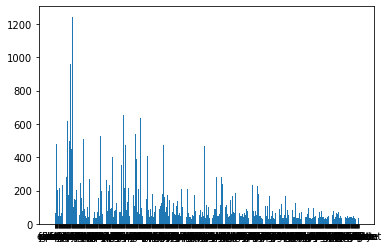

In [34]:
import matplotlib.pyplot as plt

dict_graph = usefull_tag_dict
#dict_graph = sorted(usefull_tag_dict.items(), key=lambda x: x[1], reverse=True)

plt.bar(range(len(dict_graph)), list(dict_graph.values()), align='center')
plt.xticks(range(len(dict_graph)), list(dict_graph.keys()))
plt.savefig('tags.png')

### Classifier/Annontator Training step

Describe the model and the model training step

- Include a description the feature space used
- Include a description of the selected classification or annotation model
- Describe the training process and expected runtime for training

In [35]:
"""code that executes model training step"""

'code that executes model training step'

### Classifier/Annotator Testing step

Describe the testing of the trained model's performace against a defined test set.

- Include the raw performance
- Include the source of ground truth for the evaluation
- Include figures for FP/FN/ROC type metrics describing the model performance.

In [36]:
"""code that executes the model testing step"""

'code that executes the model testing step'

### Interpretation
Sumamrize the model performance and findings related to specific misclassified items also a breif description of the findings as they correpsonde to generalizability.